#Import Library

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('ionosphere.csv')
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,1
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,1
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,1
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,1


In [ ]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,...,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480,0.641026
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,...,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337,0.480384
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,...,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350,0.000000
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,...,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000,1.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,...,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660,1.000000
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
x = data.drop('Class', axis=1)
y = data['Class']
print(x)
print(y)

     V1  V2       V3       V4       V5       V6       V7       V8       V9  \
0     1   0  0.99539 -0.05889  0.85243  0.02306  0.83398 -0.37708  1.00000   
1     1   0  1.00000 -0.18829  0.93035 -0.36156 -0.10868 -0.93597  1.00000   
2     1   0  1.00000 -0.03365  1.00000  0.00485  1.00000 -0.12062  0.88965   
3     1   0  1.00000 -0.45161  1.00000  1.00000  0.71216 -1.00000  0.00000   
4     1   0  1.00000 -0.02401  0.94140  0.06531  0.92106 -0.23255  0.77152   
..   ..  ..      ...      ...      ...      ...      ...      ...      ...   
346   1   0  0.83508  0.08298  0.73739 -0.14706  0.84349 -0.05567  0.90441   
347   1   0  0.95113  0.00419  0.95183 -0.02723  0.93438 -0.01920  0.94590   
348   1   0  0.94701 -0.00034  0.93207 -0.03227  0.95177 -0.03431  0.95584   
349   1   0  0.90608 -0.01657  0.98122 -0.01989  0.95691 -0.03646  0.85746   
350   1   0  0.84710  0.13533  0.73638 -0.06151  0.87873  0.08260  0.88928   

         V10  ...      V25      V26      V27      V28      V29 

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=151, stratify=y, random_state=0)

#Fungsi mengambil data


Modeling

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(units = 1, activation= 'tanh', kernel_initializer = 'he_uniform', input_shape =[34]))
opt = keras.optimizers.Adam(learning_rate = 0.01)
model.compile(loss ='MSE', optimizer= opt, metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 35        
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


In [ ]:
epoch = 1000
hist = model.fit(X_train, Y_train, epochs = epoch, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/1000
7/7 [==============================] - 1s 38ms/step - loss: 0.7177 - accuracy: 0.4050 - val_loss: 0.3400 - val_accuracy: 0.5960
Epoch 2/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.2341 - accuracy: 0.6950 - val_loss: 0.2270 - val_accuracy: 0.7086
Epoch 3/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.1857 - accuracy: 0.7400 - val_loss: 0.2165 - val_accuracy: 0.7219
Epoch 4/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.1753 - accuracy: 0.7700 - val_loss: 0.2170 - val_accuracy: 0.7152
Epoch 5/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.1709 - accuracy: 0.7750 - val_loss: 0.2158 - val_accuracy: 0.7351
Epoch 6/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.1667 - accuracy: 0.7850 - val_loss: 0.2122 - val_accuracy: 0.7417
Epoch 7/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.1596 - accuracy: 0.8150 - val_loss: 0.2081 - val_accuracy: 0.7550
Epoch 8/1000
7/7 [=

In [ ]:
akurasi_model = hist.history['accuracy']
loss_model = hist.history['loss']
val_akurasi = hist.history['val_accuracy']
val_loss = hist.history['val_loss']

In [ ]:
print(akurasi_model[-1])
model.evaluate(X_test, Y_test)

0.925000011920929
5/5 [==============================] - 0s 2ms/step - loss: 0.1682 - accuracy: 0.8079


[0.16822445392608643, 0.807947039604187]

In [ ]:
max_akurasi_model = 0
for i in range(epoch):
  if akurasi_model[i] > max_akurasi_model:
    max_akurasi_model = akurasi_model[i]
    j = i + 1
val_akurasi_j = val_akurasi[j]

In [ ]:
max_val_akurasi = 0
for i in range(epoch):
  if val_akurasi[i] > max_val_akurasi:
    max_val_akurasi = val_akurasi[i]
    k = i + 1
akurasi_model_k = akurasi_model[k]

In [ ]:
max_akurasi_model = '{:.2%}'.format(max_akurasi_model)
val_akurasi_j = '{:.2%}'.format(val_akurasi_j)
print(f"Model mendapatkan jumlah akurasi training tertinggi {max_akurasi_model} pada epoch ke- {j}")
print("Akurasi testing pada akurasi model training tertinggi adalah " + val_akurasi_j)

Model mendapatkan jumlah akurasi training tertinggi 94.00% pada epoch ke- 58
Akurasi testing pada akurasi model training tertinggi adalah 83.44%


In [ ]:
max_val_akurasi = '{:.2%}'.format(max_val_akurasi)
akurasi_model_k = '{:.2%}'.format(akurasi_model_k)
print(f"Model mendapatkan jumlah akurasi testing tertinggi {max_val_akurasi} pada epoch ke- {k}")
print("Akurasi training pada akurasi model testing tertinggi adalah " + akurasi_model_k)

Model mendapatkan jumlah akurasi testing tertinggi 84.77% pada epoch ke- 110
Akurasi training pada akurasi model testing tertinggi adalah 93.00%


In [ ]:
akurasi = '{:.2%}'.format(sum(hist.history['accuracy'])/len(hist.history['accuracy']))
print(f"Model mendapatkan rata-rata akurasi sebesar {akurasi} dengan jumlah epoch {epoch}")

Model mendapatkan rata-rata akurasi sebesar 92.34% dengan jumlah epoch 1000


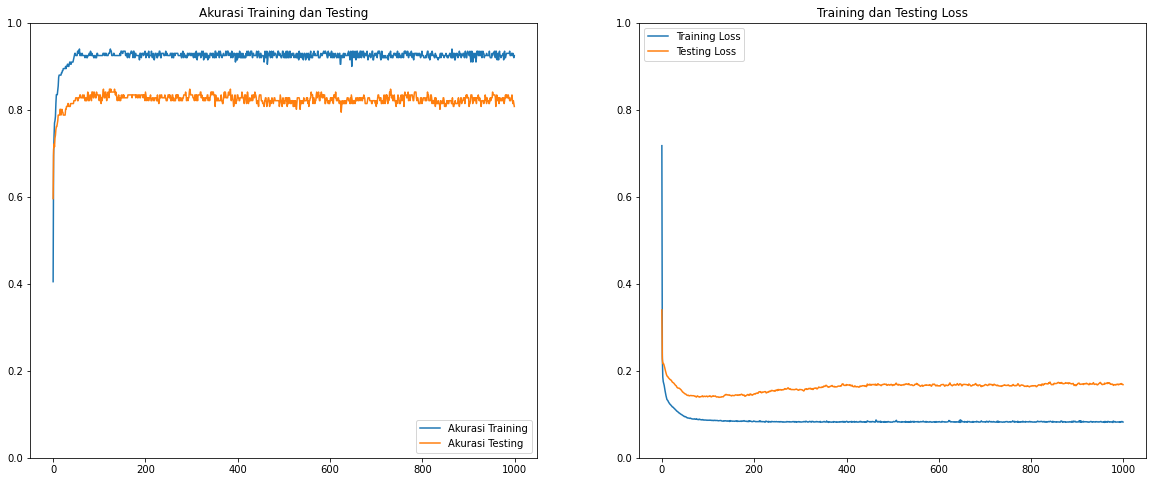

In [ ]:
# ploting
epochs_range = range(epoch)

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, akurasi_model, label='Akurasi Training')
plt.plot(epochs_range, val_akurasi, label='Akurasi Testing')
plt.legend(loc='lower right')
plt.ylim([0, 1])
plt.title('Akurasi Training dan Testing')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_model, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Testing Loss')
plt.legend(loc='upper left')
plt.title('Training dan Testing Loss')
plt.ylim([0, 1])
plt.show()